# Business Understanding

According to the UN climate report this year, some of the global warming effects are now irreversible. The effects of this are detrimental, as the sea levels continue to rise, due to the melting of ice in the arctic, areas located below the sea level are at high risk. Furthermore, as the temperature increases, this also results in extreme weather events such as hurricanes, wildfires, and drought. To mitigate global warming, some have already resorted to using clean and renewable energy sources. This can be seen as more communities are trying to replace their traditional energy sources that rely on fossil fuels, with clean energy such as solar and wind. Hence, it is crucial to estimate the future energy demand so that a more clear and realistic goal can be set for the communities. 

In this project, I will build a predictive model that estimates the future electricity consumption in New York City based on its weather data. Energy usage is correlated with the temperatures. People are more likely to use more air conditioning in hot weather and more heaters during cold periods. The project aims to help decision makers from all sectors understand the magnitude of the global warming effect and to aid in better preparation as we attempt to meet the future energy demand while adopting more clean and renewable energy. 

# Data Understanding

NYC Electricity Consumption Dataset: The dataset was found at the NYC Open Data website. The data was provided by New York City Housing Authority (NYCHA). It contains monthly electricity consumption and cost data from 2010 January to 2021 February by borough and development. It includes features such as electricity consumption, utility vendor and meter information. The electricity consumption data was provided in kilowatt (kW) as well as in kilowatt-hours (kWh). The difference between kWh and kW is that kW reflects the rate of electricity you use, and kWh indicates the amount of electricity you use. For this project, kWh will be taken into account. https://data.cityofnewyork.us/Housing-Development/Electric-Consumption-And-Cost-2010-April-2020-/jr24-e7cr

NYC Weather Dataset: The dataset was gathered from the National Oceanic and Atmospheric Administration (NOAA), an American scientific and regulatory agency within the United States Department of Commerce. It contains monthly mean maximum, mean minimum and mean temperatures; monthly total precipitation and snowfall; departure from normal of the mean temperature and total precipitation; monthly heating and cooling degree days; number of days that temperatures and precipitation are above or below certain thresholds; extreme daily temperature and precipitation amounts; number of days with fog; and number of days with thunderstorms. https://www.ncdc.noaa.gov/cdo-web/datasets/GSOM/locations/CITY:US360019/detail

# EDA and Data Cleaning

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, acf, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(3)

## Electricity Consumption Dataset

In [83]:
preview_e = pd.read_csv("Electric_Consumption_And_Cost__2010_-_April_2020_.csv")

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
preview_e.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20


In [85]:
preview_e[0:4].T

,0,1,2,3
Development Name,ADAMS,ADAMS,ADAMS,ADAMS
Borough,BRONX,BRONX,BRONX,BRONX
Account Name,ADAMS,ADAMS,ADAMS,ADAMS
Location,BLD 05,BLD 05,BLD 05,BLD 05
Meter AMR,NONE,NONE,NONE,NONE
Meter Scope,BLD 01 to 07,BLD 01 to 07,BLD 01 to 07,BLD 01 to 07
TDS #,118,118,118,118
EDP,248,248,248,248
RC Code,B011800,B011800,B011800,B011800
Funding Source,FEDERAL,FEDERAL,FEDERAL,FEDERAL


>The first 4 rows are the data from the same location. It looks like the dataset is organized by location and sorted by month. 

In [86]:
preview_e.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,360690.000000,362630.000000,3.626300e+05,362622.000000,362630.000000,3.626300e+05,362630.000000,362630.000000,362630.000000,362630.000000
mean,117.804164,424.808728,5.259728e+06,30.420565,4213.435430,3.181071e+04,1493.563547,64.579469,956.648705,1763.223178
std,128.750224,186.296821,2.508627e+06,1.738034,6055.361739,4.976442e+04,2518.766222,620.513443,1637.013845,3580.983245
min,1.000000,63.000000,1.726303e+06,1.000000,-1207.550000,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,33.000000,225.000000,3.037077e+06,29.000000,530.330000,0.000000e+00,0.000000,0.000000,0.000000,7.792500
50%,64.000000,426.000000,4.759979e+06,30.000000,2348.580000,1.472000e+04,638.110000,25.490000,322.400000,949.450000
75%,155.000000,552.000000,7.794804e+06,32.000000,5598.632500,4.696000e+04,2126.127500,92.160000,1400.500000,2710.912500
max,582.000000,999.000000,9.860630e+06,257.000000,329800.370000,1.779600e+06,195575.860000,329074.000000,78782.960000,134224.510000


In [87]:
preview_e.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [88]:
preview_e['Borough'].unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'NON DEVELOPMENT FACILITY', 'FHA'], dtype=object)

In [89]:
preview_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

In [90]:
preview_e.loc[:, ['Service Start Date', 'Service End Date']]

,Service Start Date,Service End Date
0,12/24/2009,01/26/2010
1,01/26/2010,02/25/2010
2,02/25/2010,03/26/2010
3,03/26/2010,04/26/2010
4,04/26/2010,05/24/2010
...,...,...
362625,01/26/2021,02/25/2021
362626,01/26/2021,02/25/2021
362627,01/26/2021,02/25/2021
362628,01/26/2021,02/25/2021


In [91]:
preview_e.isna().sum()

Development Name         683
Borough                    0
Account Name               0
Location                9518
Meter AMR                154
Meter Scope           343524
TDS #                   1940
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         8
Service End Date           8
# days                     8
Meter Number               0
Estimated                341
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)           0
KW Charges                 0
Other charges              0
dtype: int64

In [92]:
missing = preview_e.loc[preview_e['Service End Date'].isna()]
missing

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
294047,LOWER EAST SIDE II,MANHATTAN,LOWER EAST SIDE II,BLD 03,NONE,APT 01A - Management Office,337.0,783,M033700,FEDERAL,...,5503302,NaN,0.00,GOV/NYC/062,Yes,0,0.0,0.0,0.0,0.00
296910,RED HOOK EAST,BROOKLYN,RED HOOK EAST,BLD 29 - STORE 4,NONE,NaN,4.0,202,K000400,FEDERAL,...,009956008,N,15.96,EL2,Yes,0,0.0,0.0,0.0,15.96
296913,RED HOOK EAST,BROOKLYN,RED HOOK EAST,BLD 29 - STORE 5,NONE,NaN,4.0,202,K000400,FEDERAL,...,009956007,N,20.22,EL2,Yes,0,0.0,0.0,0.0,20.22
337296,LOWER EAST SIDE II,MANHATTAN,LOWER EAST SIDE II,BLD 03,NONE,APT 01A - Management Office,337.0,783,M033700,FEDERAL,...,5503302,NaN,0.00,GOV/NYC/062,Yes,0,0.0,0.0,0.0,0.00
337297,LOWER EAST SIDE II,MANHATTAN,LOWER EAST SIDE II,BLD 03,NONE,APT 01A - Management Office,337.0,783,M033700,FEDERAL,...,5503302,N,0.04,GOV/NYC/062,Yes,0,0.0,0.0,0.0,0.04
337298,LOWER EAST SIDE II,MANHATTAN,LOWER EAST SIDE II,BLD 03,NONE,APT 01A - Management Office,337.0,783,M033700,FEDERAL,...,5503302,N,0.00,GOV/NYC/062,Yes,0,0.0,0.0,0.0,0.00
347294,RED HOOK EAST,BROOKLYN,RED HOOK EAST,BLD 29 - STORE 4,NONE,NaN,4.0,202,K000400,FEDERAL,...,009956008,N,15.96,EL2,Yes,0,0.0,0.0,0.0,15.96
347298,RED HOOK EAST,BROOKLYN,RED HOOK EAST,BLD 29 - STORE 5,NONE,NaN,4.0,202,K000400,FEDERAL,...,009956007,N,20.22,EL2,Yes,0,0.0,0.0,0.0,20.22


In [93]:
len(missing.index)

8

In [94]:
# dropping rows with missing date
preview_e = preview_e.drop(missing.index, axis=0)

In [95]:
preview_e.isna().sum()

Development Name         683
Borough                    0
Account Name               0
Location                9518
Meter AMR                154
Meter Scope           343520
TDS #                   1940
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         0
Service End Date           0
# days                     0
Meter Number               0
Estimated                339
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)           0
KW Charges                 0
Other charges              0
dtype: int64

In [96]:
preview_e['DATE'] = pd.to_datetime(preview_e['Service End Date'], format="%m/%d/%Y")

In [97]:
# checking time range of the dataset
preview_e['DATE'].min(), preview_e['DATE'].max()

(Timestamp('2010-01-20 00:00:00'), Timestamp('2021-02-25 00:00:00'))

In [98]:
preview_e.set_index('DATE', inplace=True)

In [99]:
# seperating boroughs
Manhattan = preview_e.loc[preview_e['Borough'] == 'MANHATTAN']
Bronx = preview_e.loc[preview_e['Borough'] == 'BRONX']
Brooklyn = preview_e.loc[preview_e['Borough'] == 'BROOKLYN']
Queens = preview_e.loc[preview_e['Borough'] == 'QUEENS']
Staten = preview_e.loc[preview_e['Borough'] == 'STATEN ISLAND']

In [100]:
Manhattan['Location'].unique()

array(['BLD 01', 'BLD 06', 'BLD 04', 'BLD 09', 'BLD 12', 'BLD 02',
       'BLD 10', 'BLD 13', 'BLD 08', 'BLD 11', 'BLD 03', 'BLD 05', nan,
       'BLD 18', 'BLD 28', 'DOUGLASS I BLD 11', 'DOUGLASS I BLD 01',
       'DOUGLASS I BLD 08', 'DOUGLASS I BLD 09', 'DOUGLASS I BLD 16',
       'DOUGLASS I BLD 05', 'DOUGLASS I BLD 06', 'DOUGLASS I BLD 04',
       'DOUGLASS I BLD 07', 'DOUGLASS I BLD 17', 'DOUGLASS I BLD 12',
       'DOUGLASS II BLD 13', 'DOUGLASS II BLD 14', 'DOUGLASS II BLD 01',
       'DOUGLASS II BLD 15', 'DOUGLASS II BLD 02', 'DOUGLASS II BLD 03',
       'BLD 05 - Community Center', 'BLD 07', 'BLD 03 - Community Center',
       'BLD 02 - Community Center', 'BLD 14', 'BLD 10 - Community Center',
       'JEFFERSON BLD 01', 'JEFFERSON BLD 03', 'JEFFERSON BLD 10',
       'JEFFERSON BLD 07', 'JEFFERSON BLD 06', 'JEFFERSON BLD 16',
       'JEFFERSON BLD 13', 'JEFFERSON BLD 04', 'JEFFERSON BLD 18',
       'JEFFERSON BLD 08', 'JEFFERSON BLD 09', 'JEFFERSON BLD 12',
       'JEFFERSON 

>It looks like 'Location' indicates a building.

In [101]:
print('The dataset has data from', Manhattan['Location'].nunique(), 'buildings in Manhattan.')
print('The dataset has data from', Bronx['Location'].nunique(), 'buildings in the Bronx.')
print('The dataset has data from', Brooklyn['Location'].nunique(), 'buildings in Brooklyn.')
print('The dataset has data from', Queens['Location'].nunique(), 'buildings in Queens.')
print('The dataset has data from', Staten['Location'].nunique(), 'buildings in Staten Island.')

The dataset has data from 195 buildings in Manhattan.
The dataset has data from 69 buildings in the Bronx.
The dataset has data from 262 buildings in Brooklyn.
The dataset has data from 93 buildings in Queens.
The dataset has data from 10 buildings in Staten Island.


In [102]:
print('The dataset has', len(Manhattan), 'Manhattan data.')
print('The dataset has', len(Bronx), 'Bronx data.')
print('The dataset has', len(Brooklyn), 'Brooklyn data.')
print('The dataset has', len(Queens), 'Queens data.')
print('The dataset has', len(Staten), 'Staten data.')

The dataset has 93078 Manhattan data.
The dataset has 82782 Bronx data.
The dataset has 138234 Brooklyn data.
The dataset has 42449 Queens data.
The dataset has 2776 Staten data.


>This is obviously not all the data in New York City as the number of buildings in the dataset is small. When resampling time series datasets, summing the consumption data for each month would be misleading due to the insufficient data. It makes more sense to use mean value for each month. For this project, I will group data by borough and resample by monthly mean value. This means that the resampled figure will represent average building electricity consumption in each borough. 

In [103]:
# creating monthly time series dataset
electric_manhattan = Manhattan.resample('MS').mean()
electric_bronx = Bronx.resample('MS').mean()
electric_brooklyn = Brooklyn.resample('MS').mean()
electric_queens = Queens.resample('MS').mean()
electric_staten = Staten.resample('MS').mean()
electric_manhattan

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
DATE,,,,,,,,,,
2010-01-01,153.062400,422.840000,1.864067e+06,32.977600,5920.373584,49050.579200,2856.579760,81.289776,1030.621216,2033.172608
2010-02-01,150.317536,418.633491,1.851625e+06,29.996840,5209.318088,42389.737757,2473.058863,77.466367,982.311169,1753.948057
2010-03-01,151.031496,419.362205,1.853456e+06,29.020472,5227.610898,40492.149606,2359.905874,78.058252,992.384488,1875.320535
2010-04-01,150.461417,418.916535,1.857155e+06,30.973228,5627.110929,40533.979528,2356.151827,79.519465,1006.433906,2264.525197
2010-05-01,150.461417,418.916535,1.858569e+06,28.007874,5894.134315,41163.179528,2391.845386,93.629291,1185.370724,2316.918205
...,...,...,...,...,...,...,...,...,...,...
2020-10-01,111.793779,391.523041,9.571972e+06,29.995392,3647.525841,29538.725806,982.571118,62.327880,647.545599,2017.409124
2020-11-01,111.853518,391.726644,9.637802e+06,29.000000,2878.707243,28885.369089,963.757047,54.483183,567.380473,1347.569723
2020-12-01,111.853518,391.726644,9.717936e+06,33.000000,3581.841995,32497.295271,1097.292849,56.265029,590.974556,1893.574591


In [104]:
# extracting consumption data
electric_manhattan = pd.DataFrame(electric_manhattan['Consumption (KWH)'])
electric_bronx = pd.DataFrame(electric_bronx['Consumption (KWH)'])
electric_brooklyn = pd.DataFrame(electric_brooklyn['Consumption (KWH)'])
electric_queens = pd.DataFrame(electric_queens['Consumption (KWH)'])
electric_staten = pd.DataFrame(electric_staten['Consumption (KWH)'])
electric_manhattan

,Consumption (KWH)
DATE,
2010-01-01,49050.579200
2010-02-01,42389.737757
2010-03-01,40492.149606
2010-04-01,40533.979528
2010-05-01,41163.179528
...,...
2020-10-01,29538.725806
2020-11-01,28885.369089
2020-12-01,32497.295271


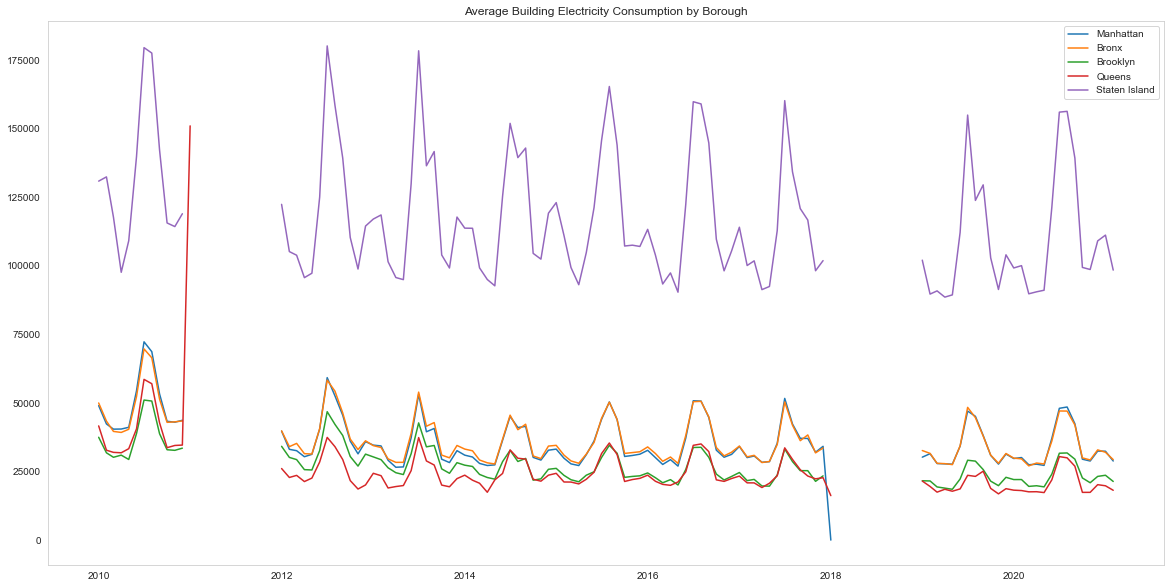

In [105]:
# plotting monthly consumption by borough
fig=plt.figure(figsize=(20,10))

plt.plot(electric_manhattan, label = "Manhattan")
plt.plot(electric_bronx, label = "Bronx")
plt.plot(electric_brooklyn, label = "Brooklyn")
plt.plot(electric_queens, label = "Queens")
plt.plot(electric_staten, label = "Staten Island")

plt.title("Average Building Electricity Consumption by Borough")
plt.legend()
plt.show()

>Staten Island's average building electricity consumption appears much higher than the rest of New York City. As the dataset includes only 10 buildings in Staten Islands, this issue requires further investigation. The dataset also includes rather small number of buildings in Queens and the Bronx. Thus, I will focus on Manhattan as a sample for this project. Next, I will investigate missing data in the dataset.

In [106]:
electric_manhattan.isna().sum()

Consumption (KWH)    23
dtype: int64

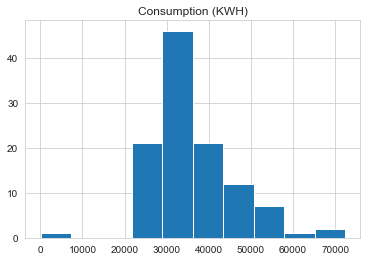

In [107]:
electric_manhattan.hist();

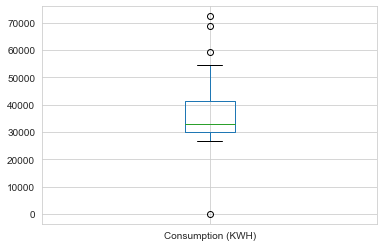

In [108]:
electric_manhattan.boxplot();

In [109]:
electric_manhattan.value_counts()

Consumption (KWH)
72308.113565         1
30943.024306         1
30112.739477         1
30136.212548         1
30141.564162         1
                    ..
40492.149606         1
40533.979528         1
40537.145912         1
40742.364246         1
72.000000            1
Length: 111, dtype: int64

In [110]:
electric_manhattan.loc[electric_manhattan['Consumption (KWH)'] <= 100]

,Consumption (KWH)
DATE,
2018-01-01,72.0


In [111]:
electric_manhattan.loc['2017-12-01'], electric_manhattan.loc['2018-01-01']

(Consumption (KWH)    34233.87194
 Name: 2017-12-01 00:00:00, dtype: float64,
 Consumption (KWH)    72.0
 Name: 2018-01-01 00:00:00, dtype: float64)

>There is no data in 2011. In 2018, there is only January consumption data but even that has a very low value (72.0). I suspect the completeness of this month's data. In order to obatin the missing data, I have reached out to New York City Housing Authority who provides the data. Until I hear from them, I will make 4 datasets: 2 versions of train set, 1 validation set and 1 test set. The first version of the train set will be the seamless data from 2012 to 2017 (6 years). Within this seamless data, I will use first 5 years as the second version of the train set and the next 1 year as a validation set. I will also keep data from 2019 as a test set. The reason I seperate the dataset in this way is to compare the results and see if seamlessness and more training data have any effect on model performance. 

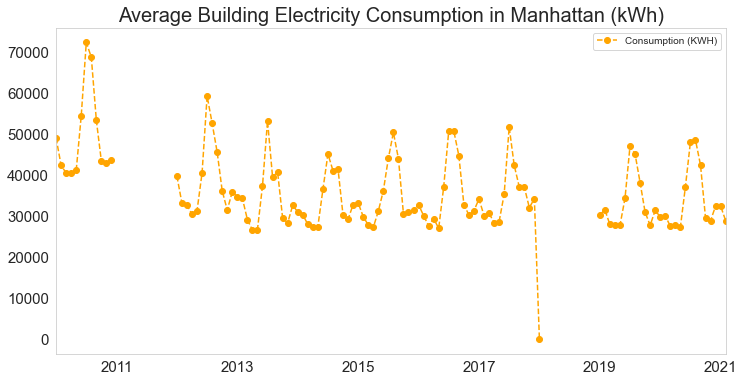

In [157]:
ax = electric_manhattan.plot(linestyle='--', marker='o', color='orange', figsize=(12,6), xlabel="")
plt.title("Average Building Electricity Consumption in Manhattan (kWh)", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
ax.axvline(electric_manhattan.index[12*2], linestyle=":", color='red')
ax.axvline(electric_manhattan.index[12*7], linestyle=":", color='green')
ax.axvline(electric_manhattan.index[12*8], linestyle=":", color='red')
ax.axvline(electric_manhattan.index[12*9], linestyle=":", color='blue')
ax.axvline(electric_manhattan.index[-1], linestyle=":", color='blue');

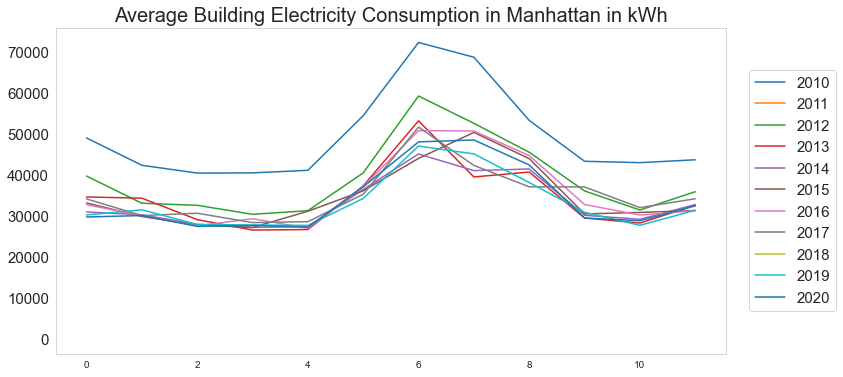

In [113]:
# plotting all years for 'Consumption (KWH)'
consumption_groups = electric_manhattan.loc[:'2020-12-01']
consumption_groups = consumption_groups.groupby(pd.Grouper(freq ='A'))
consumption_annual = pd.DataFrame() 

for yr, group in consumption_groups:
    consumption_annual[yr.year]=group.values.ravel()

consumption_annual.plot(figsize=(12,6), subplots=False, legend=True)
plt.legend(loc='upper left')

plt.title("Average Building Electricity Consumption in Manhattan in kWh", fontsize=20)
# #labels = [item.get_text() for item in ax.get_xticklabels()]
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# #plt.set_xticks([np.arrange(12)],labels) 
# plt.set_xticklabels(labels)

plt.yticks(fontsize=15)  
plt.legend(fontsize=15, loc='center', bbox_to_anchor=(1.1, 0.5))
plt.show();

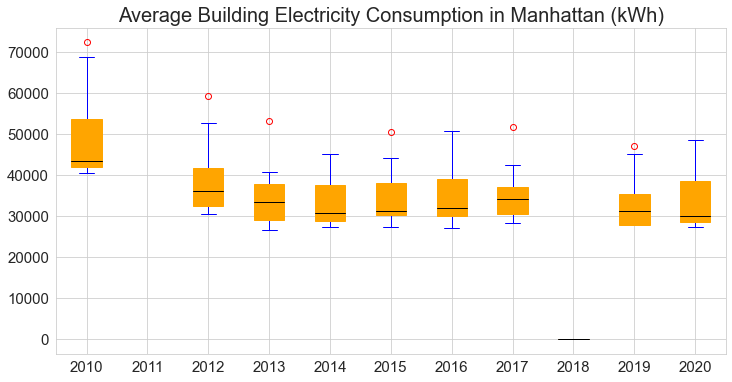

In [158]:
# plotting box plot for 'Consumption (KWH)'
sns.set_style("whitegrid", {'axes.grid' : False})

colordict = {'patch_artist': True,
         'boxprops': dict(color='orange', facecolor='orange'),
         'capprops': dict(color='blue'),
         'flierprops': dict(color='blue', markeredgecolor='red'),
         'medianprops': dict(color='black'),
         'whiskerprops': dict(color='blue')}

consumption_annual.boxplot(figsize=(12,6), **colordict)

plt.title("Average Building Electricity Consumption in Manhattan (kWh)", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()

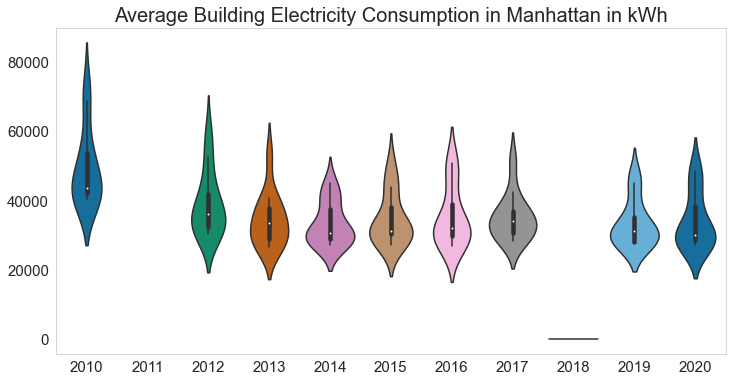

In [115]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=consumption_annual, palette='colorblind')

plt.title("Average Building Electricity Consumption in Manhattan in kWh", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()

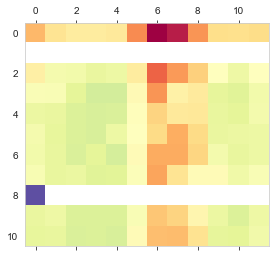

In [116]:
# plotting heatmap for 'Consumption (KWH)'
consumption_matrix = consumption_annual.T

plt.matshow(consumption_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

## Weather Dataset

In [117]:
preview_w = pd.read_csv('nyc_weather.csv')

In [118]:
preview_w.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01,3.4,"3,W",0.0,0,...,NaN,NaN,290.0,",X",290.0,"1,X",11.6,",X",17.4,"1,X"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-02,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",13.0,",X",17.9,",X"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-03,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",16.5,",X",23.7,",X"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-04,2.8,",W",11.9,0,...,NaN,NaN,270.0,",X",300.0,",X",9.4,",X",16.1,",X"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-05,2.5,",W",73.6,0,...,NaN,NaN,270.0,",X",280.0,",X",11.2,",X",17.9,",X"


In [119]:
preview_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          514 non-null    object 
 1   NAME             514 non-null    object 
 2   LATITUDE         514 non-null    float64
 3   LONGITUDE        514 non-null    float64
 4   ELEVATION        514 non-null    float64
 5   DATE             514 non-null    object 
 6   AWND             405 non-null    float64
 7   AWND_ATTRIBUTES  405 non-null    object 
 8   CDSD             417 non-null    float64
 9   CDSD_ATTRIBUTES  396 non-null    object 
 10  CLDD             417 non-null    float64
 11  CLDD_ATTRIBUTES  417 non-null    object 
 12  DP01             511 non-null    float64
 13  DP01_ATTRIBUTES  511 non-null    object 
 14  DP10             511 non-null    float64
 15  DP10_ATTRIBUTES  511 non-null    object 
 16  DSND             417 non-null    float64
 17  DSND_ATTRIBUTES 

In [120]:
preview_w['DATE'].value_counts()

2018-05    4
2015-03    4
2019-07    4
2015-09    4
2012-03    4
          ..
2013-09    3
2021-07    3
2020-07    3
2017-08    3
2016-08    3
Name: DATE, Length: 140, dtype: int64

In [121]:
preview_w['DATE'] = pd.to_datetime(preview_w['DATE'], format="%Y/%m")
preview_w.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-01,3.4,"3,W",0.0,0,...,NaN,NaN,290.0,",X",290.0,"1,X",11.6,",X",17.4,"1,X"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-02-01,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",13.0,",X",17.9,",X"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-03-01,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",16.5,",X",23.7,",X"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-04-01,2.8,",W",11.9,0,...,NaN,NaN,270.0,",X",300.0,",X",9.4,",X",16.1,",X"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-05-01,2.5,",W",73.6,0,...,NaN,NaN,270.0,",X",280.0,",X",11.2,",X",17.9,",X"


In [122]:
preview_w['DATE'].min(), preview_w['DATE'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2021-08-01 00:00:00'))

In [123]:
preview_w.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES',
       'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DSND',
       'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES',
       'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70',
       'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES',
       'EMSD', 'EMSD_ATTRIBUTES', 'EMSN', 'EMSN_ATTRIBUTES', 'EMXP',
       'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES',
       'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'TMIN', 'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WDF2',
       'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2', 'WSF2_ATTRIBUTES',
       'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [124]:
'''
I will use air temperature data from the dataset:
CDSD	Cooling Degree Days Season 
EMNT	Extreme minimum temperature 
EMXT	Extreme maximum temperature 
HDSD	Heating Degree Days Season 
TAVG	Average temperature
TMAX	Maximum temperature
TMIN	Minimum temperature
'''

'\nI will use air temperature data from the dataset:\nCDSD\tCooling Degree Days Season \nEMNT\tExtreme minimum temperature \nEMXT\tExtreme maximum temperature \nHDSD\tHeating Degree Days Season \nTAVG\tAverage temperature\nTMAX\tMaximum temperature\nTMIN\tMinimum temperature\n'

In [125]:
preview_w['NAME'].unique()

array(['NY CITY CENTRAL PARK, NY US', 'LAGUARDIA AIRPORT, NY US',
       'MIDDLE VILLAGE 0.5 SW, NY US', 'JFK INTERNATIONAL AIRPORT, NY US'],
      dtype=object)

In [126]:
# extracting temperature data
keep = ['DATE', 'NAME', 'CDSD', 'EMNT', 'EMXT', 'HDSD', 'TAVG', 'TMAX', 'TMIN']
preview_w = preview_w[keep]

In [127]:
# renaming columns
preview_w = preview_w.rename(columns={'CDSD': 'Cooling Degree Days Season',
                                      'EMNT': 'Extreme Minimum Temperature',
                                      'EMXT': 'Extreme Maximum Temperature',
                                      'HDSD': 'Heating Degree Days Season',
                                      'TAVG': 'Average Temperature',
                                      'TMAX': 'Maximum Temperature',
                                      'TMIN': 'Minimum Temperature'})

In [128]:
preview_w.set_index('DATE', inplace=True)
preview_w

,NAME,Cooling Degree Days Season,Extreme Minimum Temperature,Extreme Maximum Temperature,Heating Degree Days Season,Average Temperature,Maximum Temperature,Minimum Temperature
DATE,,,,,,,,
2010-01-01,"NY CITY CENTRAL PARK, NY US",0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,"NY CITY CENTRAL PARK, NY US",0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,"NY CITY CENTRAL PARK, NY US",0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,"NY CITY CENTRAL PARK, NY US",11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,"NY CITY CENTRAL PARK, NY US",73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...,...
2021-04-01,"JFK INTERNATIONAL AIRPORT, NY US",0.0,-1.6,22.8,2425.1,11.1,15.9,6.3
2021-05-01,"JFK INTERNATIONAL AIRPORT, NY US",26.9,5.6,34.4,2516.6,16.3,21.3,11.2
2021-06-01,"JFK INTERNATIONAL AIRPORT, NY US",136.1,11.1,32.8,2518.9,21.9,26.6,17.2


In [129]:
# seperating locations
central_park = preview_w.loc[preview_w['NAME'] == 'NY CITY CENTRAL PARK, NY US']    #Manhattan
laguardia = preview_w.loc[preview_w['NAME'] == 'LAGUARDIA AIRPORT, NY US']          #Queens
middle_village = preview_w.loc[preview_w['NAME'] == 'MIDDLE VILLAGE 0.5 SW, NY US'] #Brooklyn
jfk = preview_w.loc[preview_w['NAME'] == 'JFK INTERNATIONAL AIRPORT, NY US']        

In [130]:
# creating monthly time series dataset
weather_central_park = central_park.resample('MS').mean()

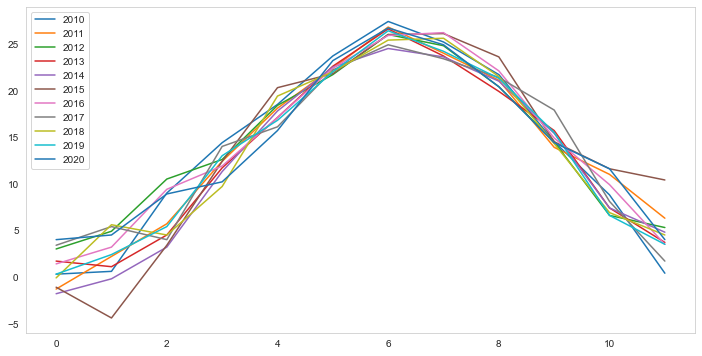

In [131]:
# plotting all years for 'Average Temperature'
year_groups = weather_central_park['Average Temperature'].loc[:'2020-12-01']
year_groups = year_groups.groupby(pd.Grouper(freq ='A'))
temp_annual = pd.DataFrame() 

for yr, group in year_groups:
    temp_annual[yr.year]=group.values.ravel()

temp_annual.plot(figsize=(12,6), subplots=False, legend=True)
plt.legend(loc='upper left')
plt.show()

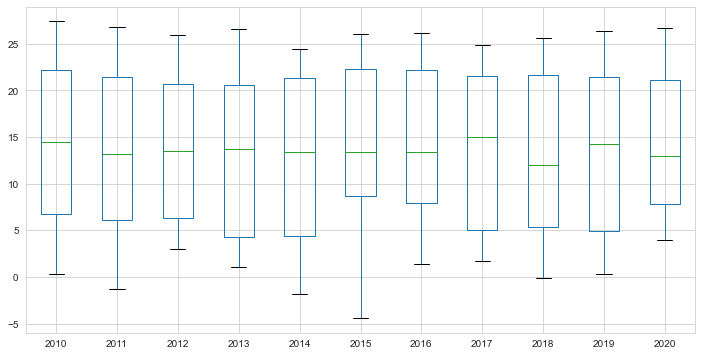

In [132]:
# plotting box plot for 'Average Temperature'
temp_annual.boxplot(figsize=(12,6))
plt.show()

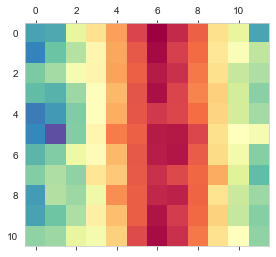

In [133]:
# plotting heatmap for 'Maximum Temperature'
year_matrix = temp_annual.T

plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

In [134]:
# counting time range in the electricity consumption dataset
(12 *11) + 2

134

>In order to merge two datasets, the index in both datasets have to be matched. The electricity consumtion dataset range from January 2010 to Feburary 2021. Thus, I will select the same range in the weather dataset. Also, the central park temperature data will be used as I selected Manhattan for the sample. 

In [135]:
weather_central_park = weather_central_park.loc[:'2021-02-01']
weather_central_park

,Cooling Degree Days Season,Extreme Minimum Temperature,Extreme Maximum Temperature,Heating Degree Days Season,Average Temperature,Maximum Temperature,Minimum Temperature
DATE,,,,,,,
2010-01-01,0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...
2020-10-01,722.3,0.0,23.3,146.8,14.4,17.7,11.0
2020-11-01,725.4,-1.0,23.9,350.6,11.6,15.5,7.8
2020-12-01,725.4,-6.6,16.7,794.1,4.0,7.3,0.8


In [136]:
weather_central_park.isna().sum()

Cooling Degree Days Season     0
Extreme Minimum Temperature    0
Extreme Maximum Temperature    0
Heating Degree Days Season     0
Average Temperature            0
Maximum Temperature            0
Minimum Temperature            0
dtype: int64

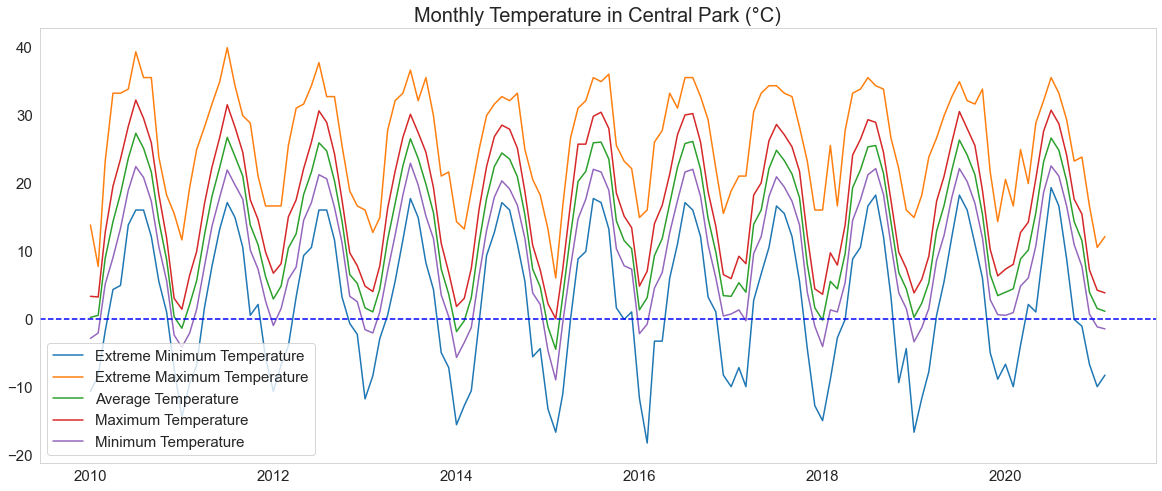

In [155]:
# plotting temperature data
fig=plt.figure(facecolor='white', figsize=(20,8))

plt.plot(weather_central_park['Extreme Minimum Temperature'], label = "Extreme Minimum Temperature")
plt.plot(weather_central_park['Extreme Maximum Temperature'], label = "Extreme Maximum Temperature")
plt.plot(weather_central_park['Average Temperature'], label = "Average Temperature")
plt.plot(weather_central_park['Maximum Temperature'], label = "Maximum Temperature")
plt.plot(weather_central_park['Minimum Temperature'], label = "Minimum Temperature")

plt.axhline(y= 0, linestyle="--", color='blue')
plt.title("Monthly Temperature in Central Park (°C)", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.legend(fontsize=15)
plt.show()

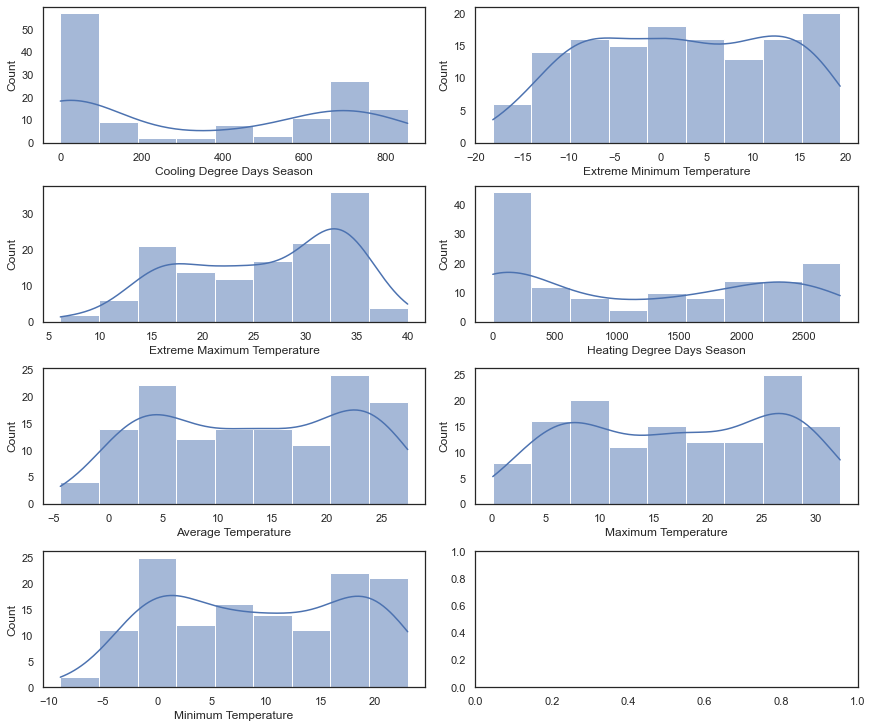

In [58]:
# plotting data distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,10), constrained_layout=True)

for axx, column in zip(axes.flatten(), weather_central_park.columns):
    sns.set_style("white")
    sns.histplot(x=weather_central_park[column], data=weather_central_park, ax=axx, kde=True)

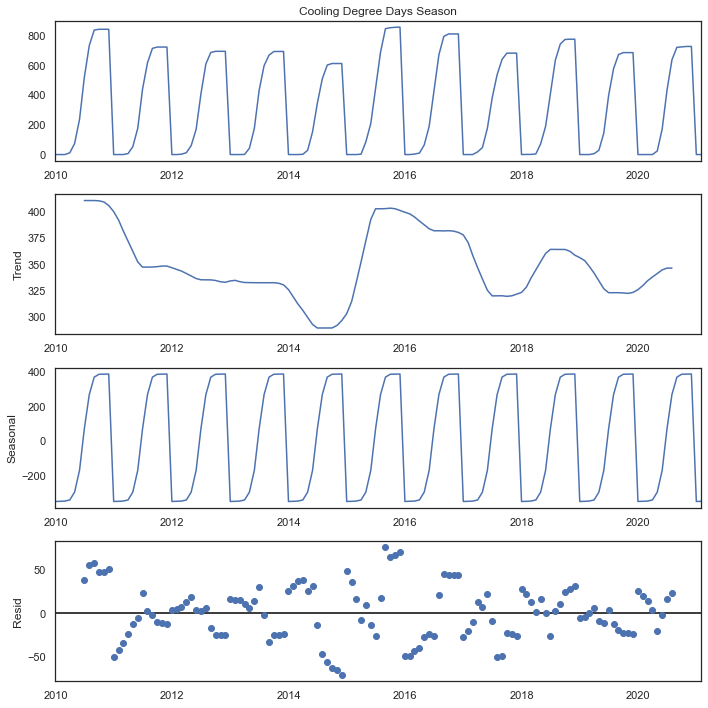

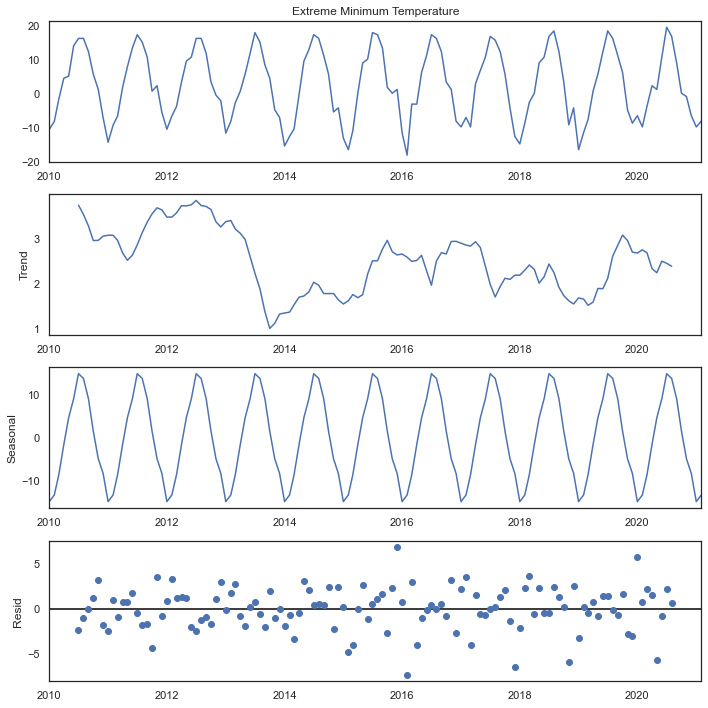

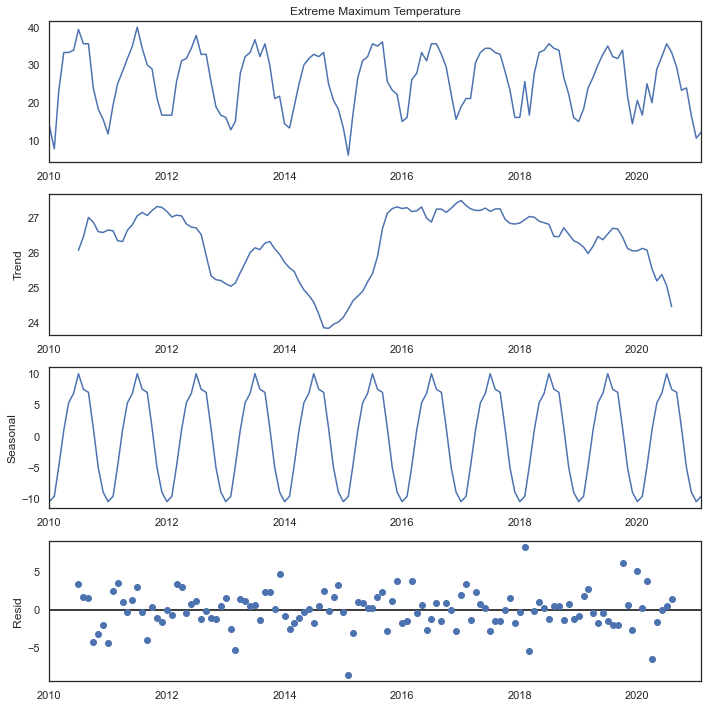

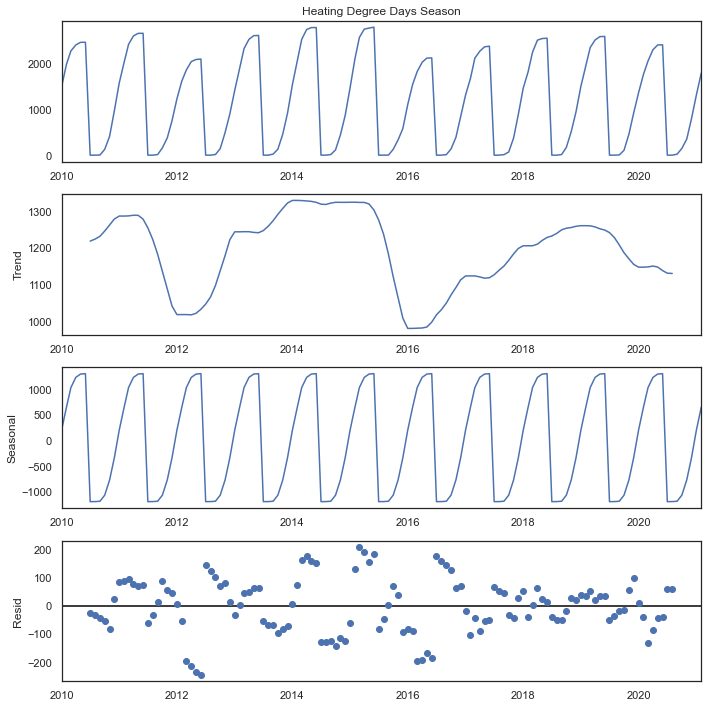

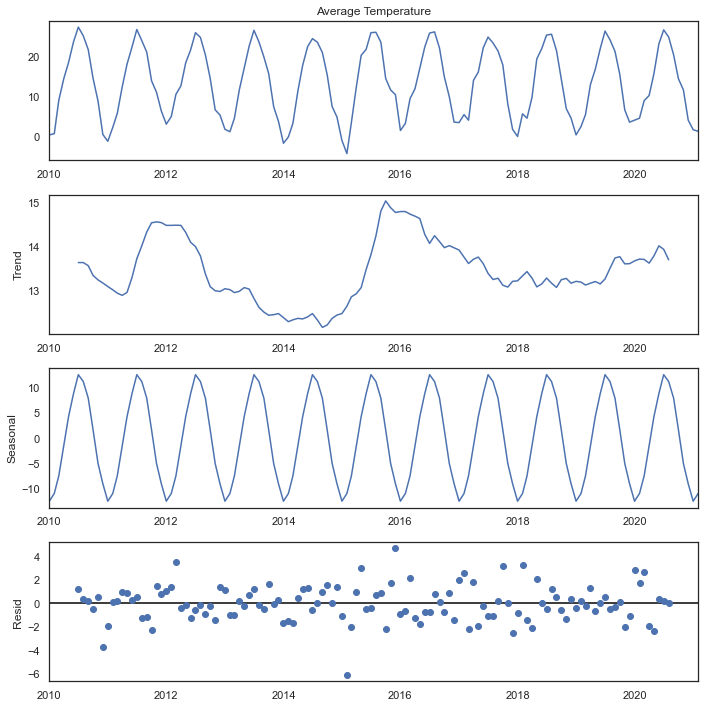

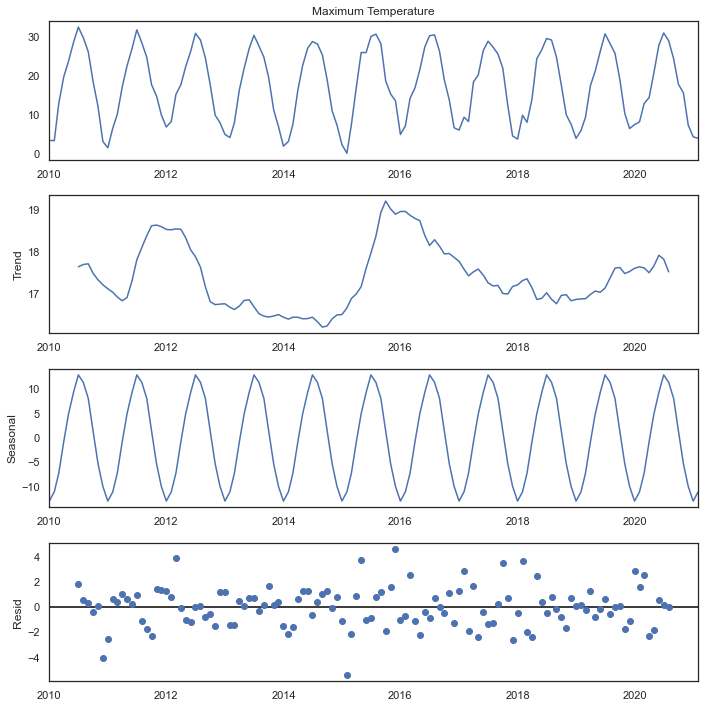

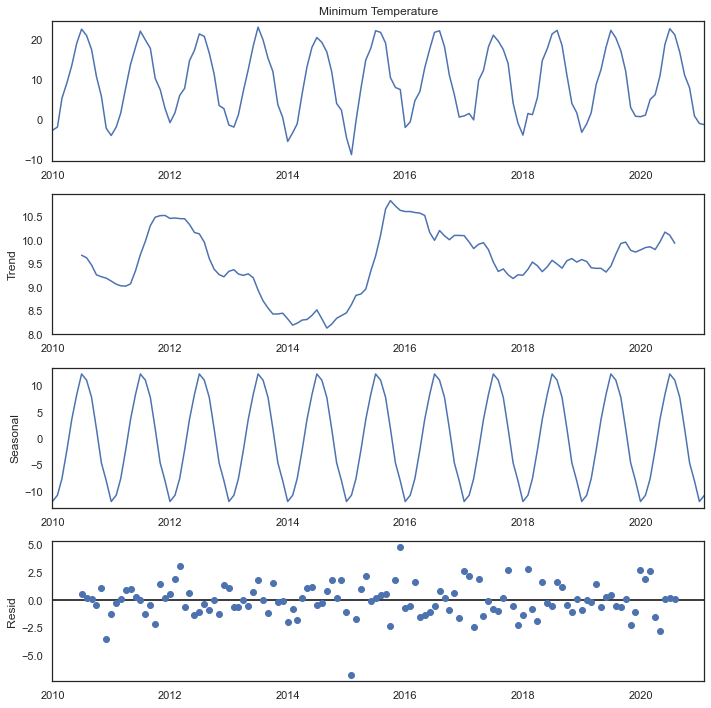

In [59]:
def decompose_time_series(series):
    plt.rcParams.update({'figure.figsize': (10,10)})
    result = seasonal_decompose(series, model='additive')
    result.plot()
    plt.show()

decompose_time_series(weather_central_park['Cooling Degree Days Season'])
decompose_time_series(weather_central_park['Extreme Minimum Temperature'])
decompose_time_series(weather_central_park['Extreme Maximum Temperature'])
decompose_time_series(weather_central_park['Heating Degree Days Season'])
decompose_time_series(weather_central_park['Average Temperature'])
decompose_time_series(weather_central_park['Maximum Temperature'])
decompose_time_series(weather_central_park['Minimum Temperature'])

>There is an upward trend in all temperature variables. It must be global warming effect.

## Merge Datasets

In [60]:
manhattan_data = electric_manhattan.merge(weather_central_park, left_index=True, right_index=True)
manhattan_data

,Consumption (KWH),Cooling Degree Days Season,Extreme Minimum Temperature,Extreme Maximum Temperature,Heating Degree Days Season,Average Temperature,Maximum Temperature,Minimum Temperature
DATE,,,,,,,,
2010-01-01,49050.579200,0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,42389.737757,0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,40492.149606,0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,40533.979528,11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,41163.179528,73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...,...
2020-10-01,29538.725806,722.3,0.0,23.3,146.8,14.4,17.7,11.0
2020-11-01,28885.369089,725.4,-1.0,23.9,350.6,11.6,15.5,7.8
2020-12-01,32497.295271,725.4,-6.6,16.7,794.1,4.0,7.3,0.8


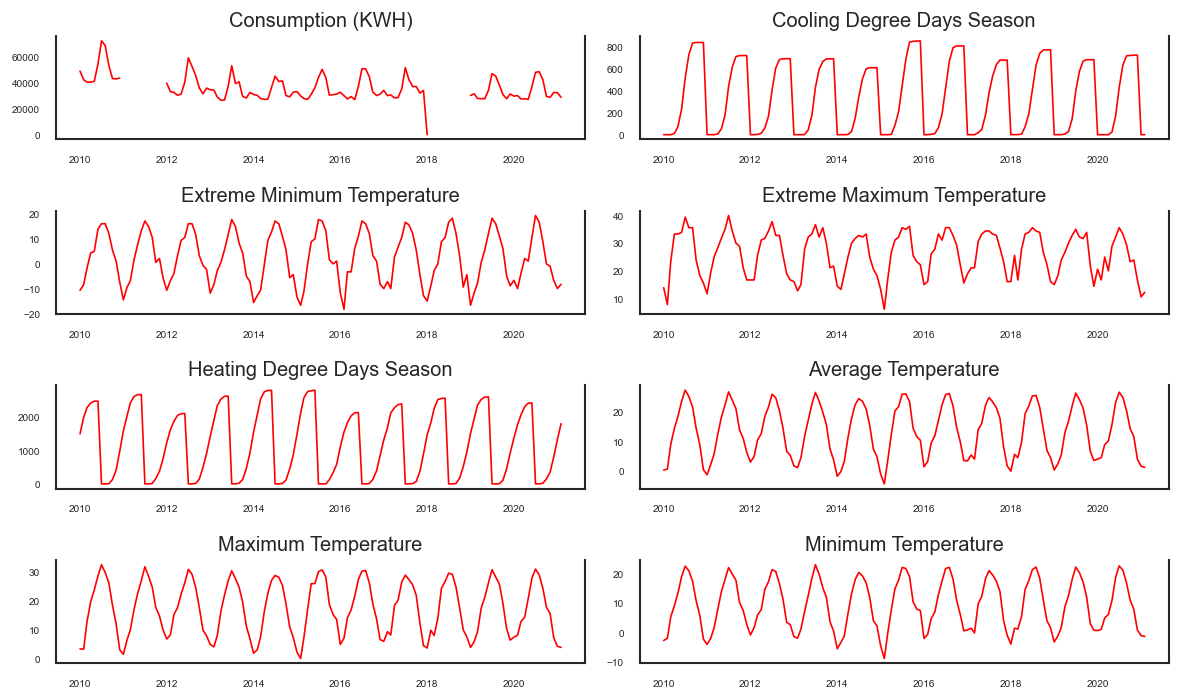

In [61]:
# plotting time series
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    data = manhattan_data[manhattan_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    ax.set_title(manhattan_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

>It is clear that all the time series have seasonality. 

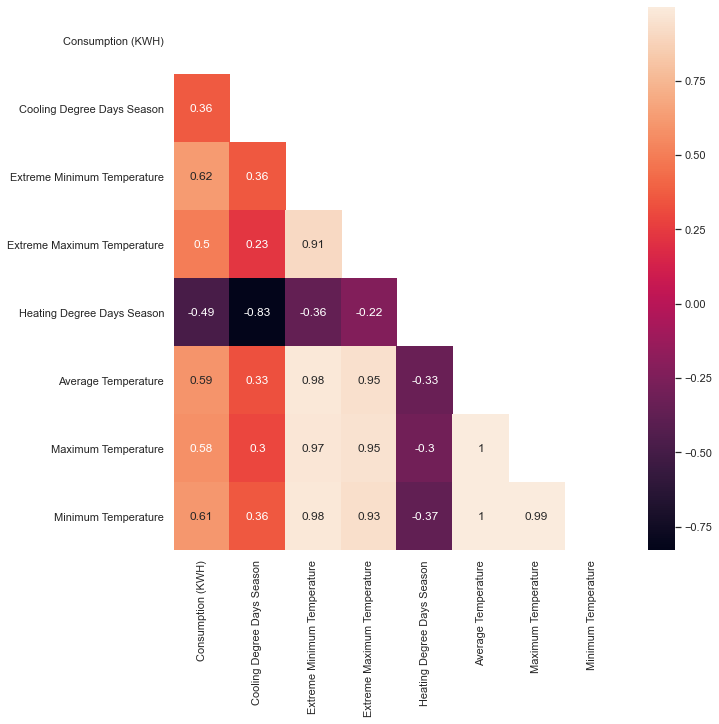

In [62]:
corr = manhattan_data.corr()

fig, axes = plt.subplots(figsize=(10,10))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

>It looks like 'Consumption (KWH)' is correlated with 'Extreme Minimum Temperature' and 'Minimum Temperature' the most.

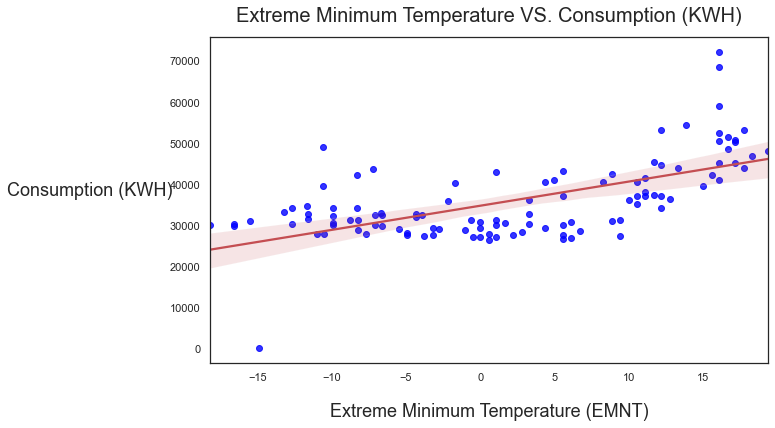

In [63]:
# plotting 'Extreme Minimum Temperature' vs. 'Consumption (KWH)'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set(font_scale=1.4)

sns.regplot(x=manhattan_data['Extreme Minimum Temperature'], 
            y=manhattan_data['Consumption (KWH)'], 
            ci=99, 
            scatter_kws={"color": "blue"}, 
            line_kws={"color": "r"})

ax.set_xlabel("Extreme Minimum Temperature (EMNT)", fontsize=18, labelpad=20)
ax.set_ylabel("Consumption (KWH)", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Extreme Minimum Temperature VS. Consumption (KWH)", fontsize=20, pad=15);

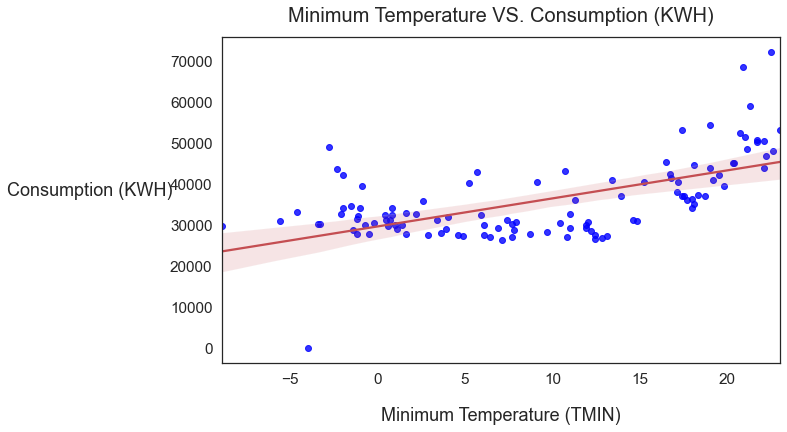

In [64]:
# plotting 'Minimum Temperature' vs. 'Consumption (KWH)'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set(font_scale=1.4)

sns.regplot(x=manhattan_data['Minimum Temperature'], 
            y=manhattan_data['Consumption (KWH)'], 
            ci=99, 
            scatter_kws={"color": "blue"}, 
            line_kws={"color": "r"})

ax.set_xlabel("Minimum Temperature (TMIN)", fontsize=18, labelpad=20)
ax.set_ylabel("Consumption (KWH)", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Minimum Temperature VS. Consumption (KWH)", fontsize=20, pad=15);

In [65]:
manhattan_data.isna().sum()

Consumption (KWH)              23
Cooling Degree Days Season      0
Extreme Minimum Temperature     0
Extreme Maximum Temperature     0
Heating Degree Days Season      0
Average Temperature             0
Maximum Temperature             0
Minimum Temperature             0
dtype: int64

In [66]:
manhattan_data.loc[manhattan_data['Consumption (KWH)'].isna()]

,Consumption (KWH),Cooling Degree Days Season,Extreme Minimum Temperature,Extreme Maximum Temperature,Heating Degree Days Season,Average Temperature,Maximum Temperature,Minimum Temperature
DATE,,,,,,,,
2011-01-01,NaN,0.0,-14.4,11.7,1575.2,-1.3,1.5,-4.1
2011-02-01,NaN,0.0,-9.4,19.4,2025.9,2.2,6.5,-2.0
2011-03-01,NaN,0.0,-6.7,25.0,2416.5,5.7,10.0,1.5
2011-04-01,NaN,6.1,1.7,28.3,2601.1,12.4,17.0,7.8
2011-05-01,NaN,52.8,7.8,31.7,2656.7,18.1,22.4,13.7
2011-06-01,NaN,176.0,13.3,35.0,2657.9,22.4,26.8,18.0
2011-07-01,NaN,438.7,17.2,40.0,0.0,26.8,31.6,22.0
2011-08-01,NaN,615.5,15.0,34.4,0.0,24.0,28.3,19.8
2011-09-01,NaN,712.5,10.6,30.0,13.0,21.1,24.6,17.7


In [67]:
manhattan_data = manhattan_data.dropna()

>As mentioned earlier, there are missing data in the consumption column in 2011 and 2018. I will use 2012-2016 as a train set version1 and 2017 as a validation set, 2012-2017 as a train set version2, and 2019 and onward as a test set.

## Granger’s Causality Test

For the first model, I will use Vector AutoRegression(VAR). The basis behind VAR is that each of the time series in the dataset influences each other. 

Using Granger’s causality test, it’s possible to test this relationship before even building the model. It tests the null hypothesis that the past values of time series(x) DO NOT cause the other series(y). 

If the p-value obtained from the test is lesser than the significance level(e.g 0.05), then, you can reject the null hypothesis and indicate that the past values of time series(x) DO cause the other series(y).

The below code implements the Granger’s causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [68]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(manhattan_data, variables = manhattan_data.columns)

,Consumption (KWH)_x,Cooling Degree Days Season_x,Extreme Minimum Temperature_x,Extreme Maximum Temperature_x,Heating Degree Days Season_x,Average Temperature_x,Maximum Temperature_x,Minimum Temperature_x
Consumption (KWH)_y,1.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0
Cooling Degree Days Season_y,0.0000,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0
Extreme Minimum Temperature_y,0.0197,0.0,1.0000,0.0006,0.0,0.0,0.0,0.0
Extreme Maximum Temperature_y,0.0089,0.0,0.0000,1.0000,0.0,0.0,0.0,0.0
Heating Degree Days Season_y,0.0000,0.0,0.0000,0.0000,1.0,0.0,0.0,0.0
Average Temperature_y,0.0435,0.0,0.0036,0.0398,0.0,1.0,0.0,0.0
Maximum Temperature_y,0.0416,0.0,0.0013,0.0114,0.0,0.0,1.0,0.0
Minimum Temperature_y,0.0542,0.0,0.0154,0.0091,0.0,0.0,0.0,1.0


The rows are the response(y) and the columns are the predictor series(x). For example, if you take the value 0.0036 in (row 'TAVG_y', column 'EMNT_x'), it refers to the p-value of 'EMNT_x' causing 'TAVG_y'. 

Here, I am looking at the first row - the Consumption(KWH) as the target variable(y) and the rest of the variables as the predictors(x). The p-values are all zeros, which means that all the variables(time series) in the dataset are influencing the Consumption(KWH). Hence, I will keep them all and conduct train-validation-test split next. 

## Train-Validation-Test Split

In [69]:
data = manhattan_data['2012-01-01':'2017-12-01'] # 2nd version of the train set
train = data[:'2016-12-01']
val = data['2017-01-01':]
test = manhattan_data['2019-01-01':]

print('manhattan_data shape: ', manhattan_data.shape)
print('data shape: ', data.shape)
print('train shape: ', train.shape)
print('val shape: ', val.shape)
print('test shape: ', test.shape)

manhattan_data shape:  (111, 8)
data shape:  (72, 8)
train shape:  (60, 8)
val shape:  (12, 8)
test shape:  (26, 8)


In [70]:
type(data), type(train), type(val), type(test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [71]:
train.describe()

,Consumption (KWH),Cooling Degree Days Season,Extreme Minimum Temperature,Extreme Maximum Temperature,Heating Degree Days Season,Average Temperature,Maximum Temperature,Minimum Temperature
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,35399.410211,348.221667,2.503333,25.921667,1180.893333,13.440000,17.420000,9.43500
std,7842.712856,329.796544,10.302558,7.980550,1045.287468,8.962506,9.271129,8.69026
min,26606.349171,0.000000,-18.200000,6.100000,0.000000,-4.400000,0.100000,-8.90000
25%,30061.195838,2.075000,-5.050000,18.750000,92.625000,4.875000,7.900000,2.05000
50%,32718.021920,276.450000,2.500000,27.250000,1008.900000,13.550000,17.600000,9.15000
75%,39960.429771,685.475000,11.250000,32.800000,2098.375000,21.875000,26.100000,17.55000
max,59260.691530,855.300000,17.800000,37.800000,2791.800000,26.600000,30.700000,23.00000


In [72]:
# lengths of val set and test set
nobs = len(val)
test_nobs = len(test)

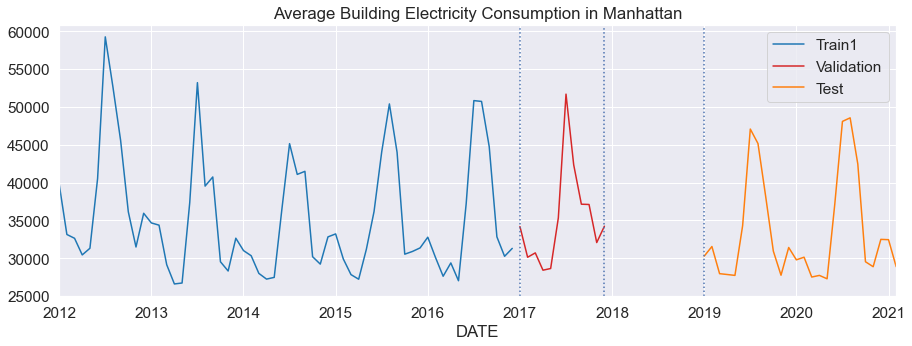

In [73]:
# 1st version of the train set
ax = train["Consumption (KWH)"].plot(figsize=(15,5), color="tab:blue", label='Train1')
_ = val["Consumption (KWH)"].plot(ax=ax, color="tab:red", label='Validation')
_ = test["Consumption (KWH)"].plot(ax=ax, color="tab:orange", label='Test')

plt.title("Average Building Electricity Consumption in Manhattan")
ax.legend()
ax.axvline(val.index[0], linestyle=":")
ax.axvline(val.index[-1], linestyle=":")
ax.axvline(test.index[0], linestyle=":");

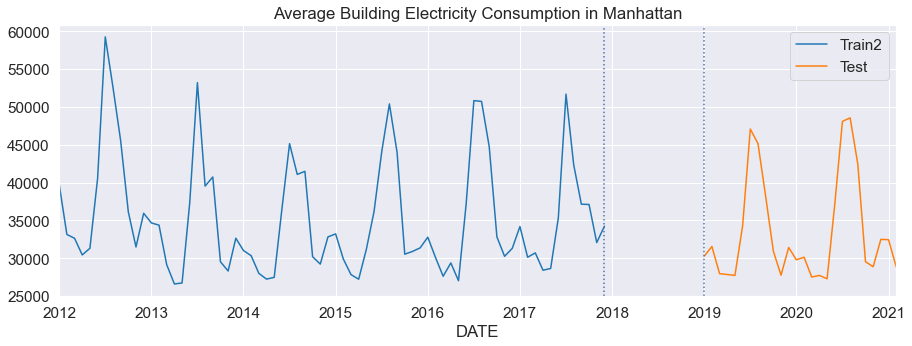

In [76]:
# 2nd version of the train set
ax = data["Consumption (KWH)"].plot(figsize=(15,5), color="tab:blue", label='Train2')
_ = test["Consumption (KWH)"].plot(ax=ax, color="tab:orange", label='Test')

plt.title("Average Building Electricity Consumption in Manhattan")
ax.legend()
ax.axvline(data.index[-1], linestyle=":")
ax.axvline(test.index[0], linestyle=":");

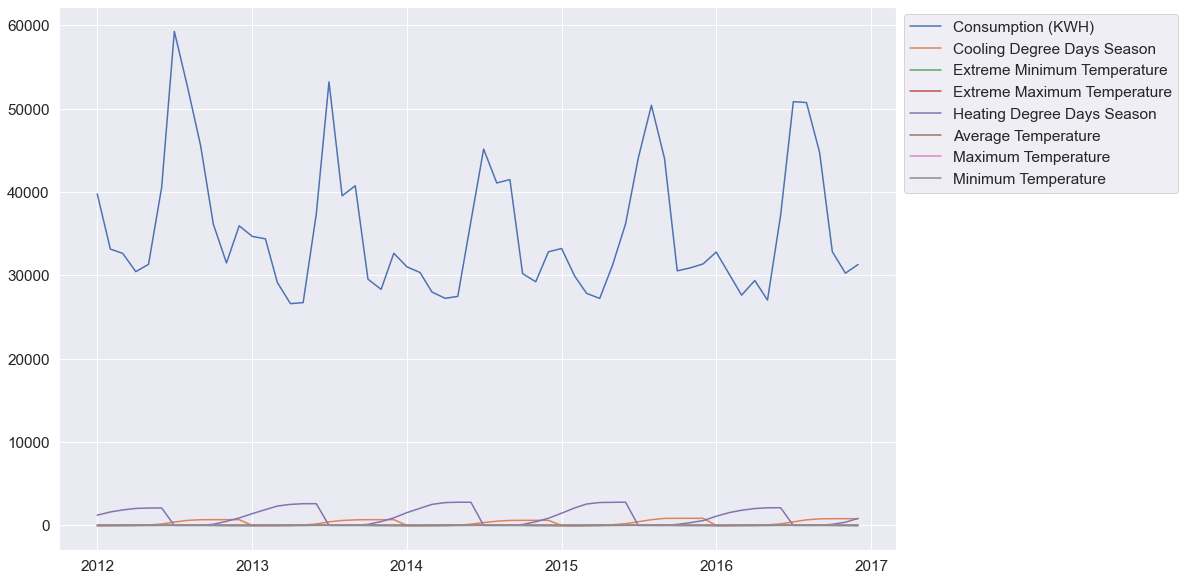

In [77]:
# plotting 1st version train set
fig, axes = plt.subplots(figsize=(15,10))

plt.plot(train)
plt.legend(train.columns, loc='upper left', bbox_to_anchor=(1, 1));

# Data Preprocessing

## Stationarity 

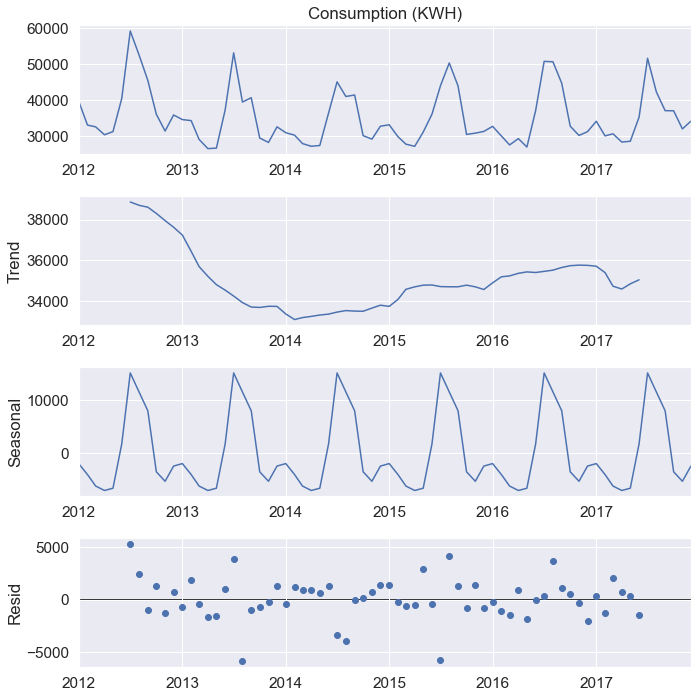

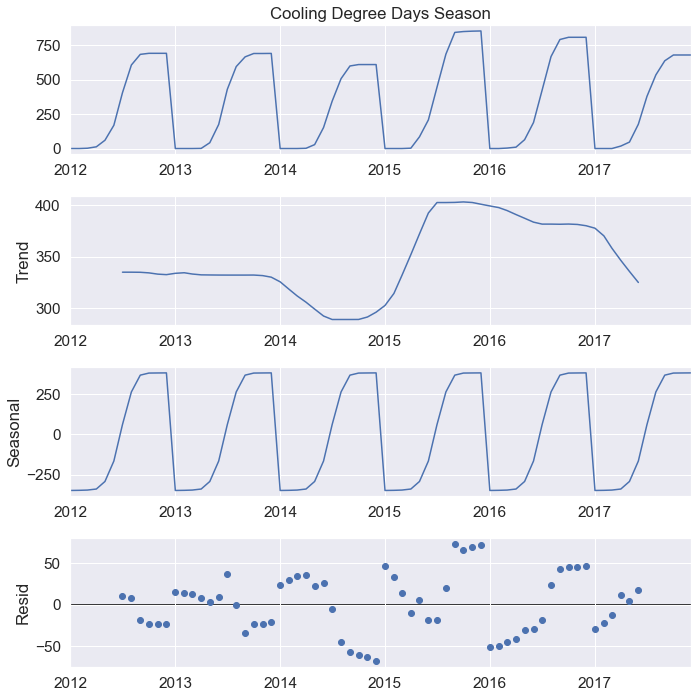

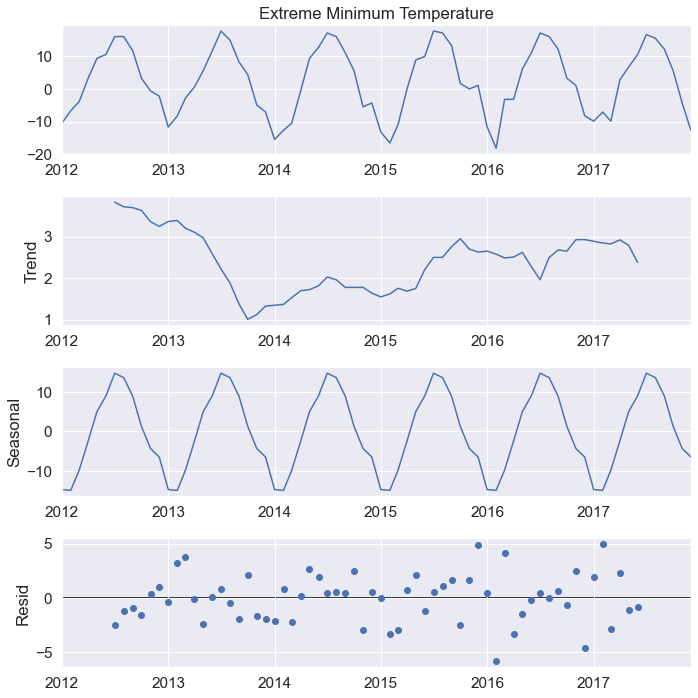

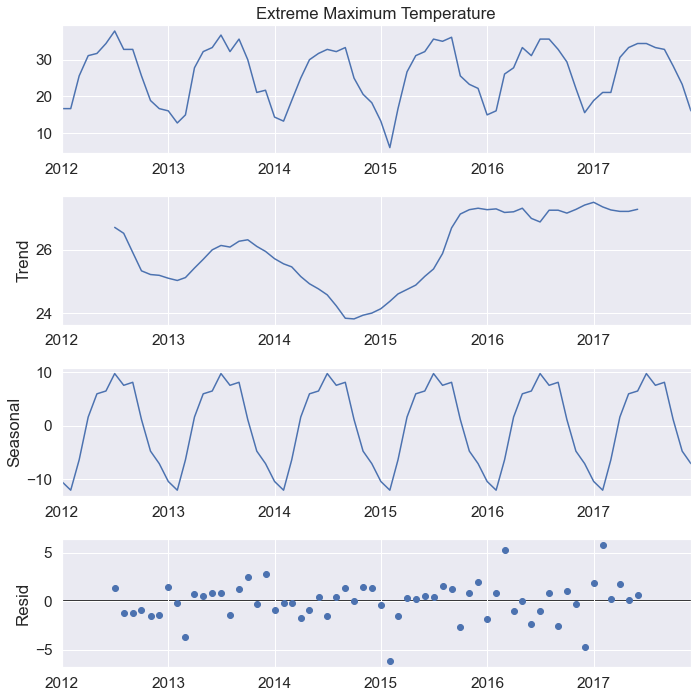

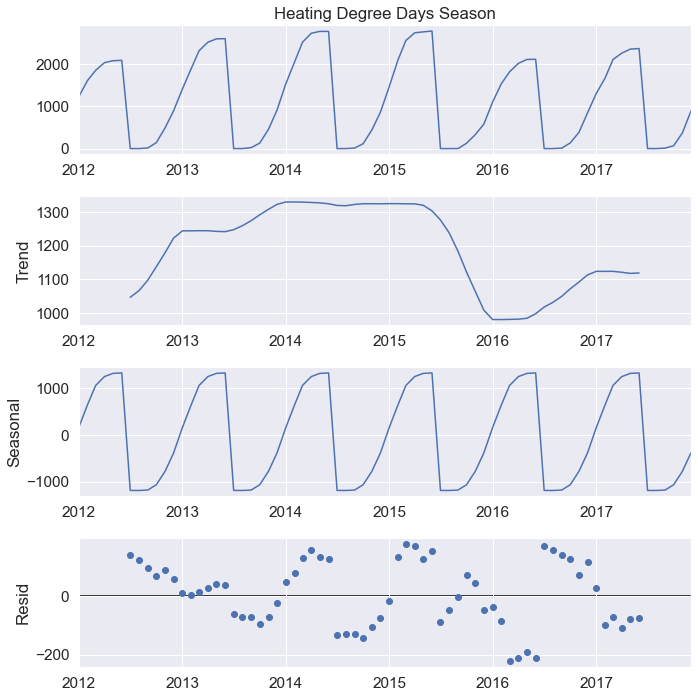

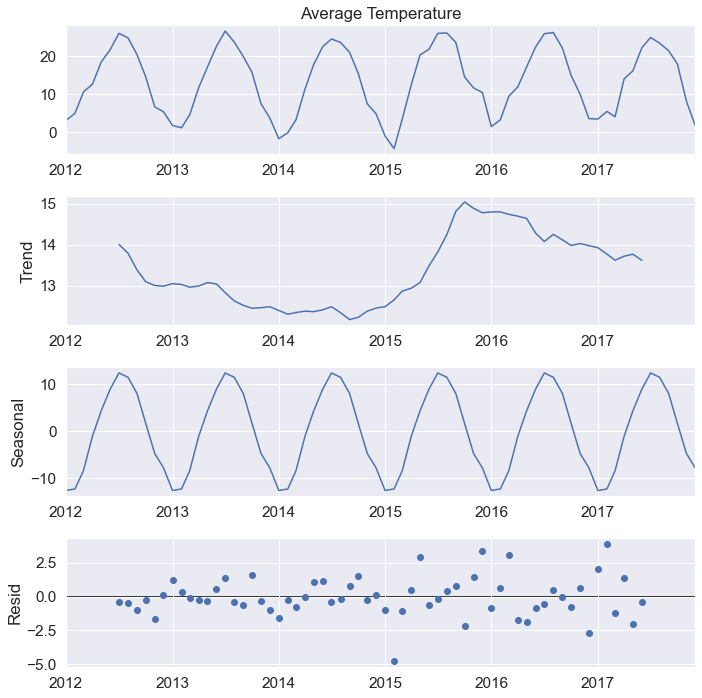

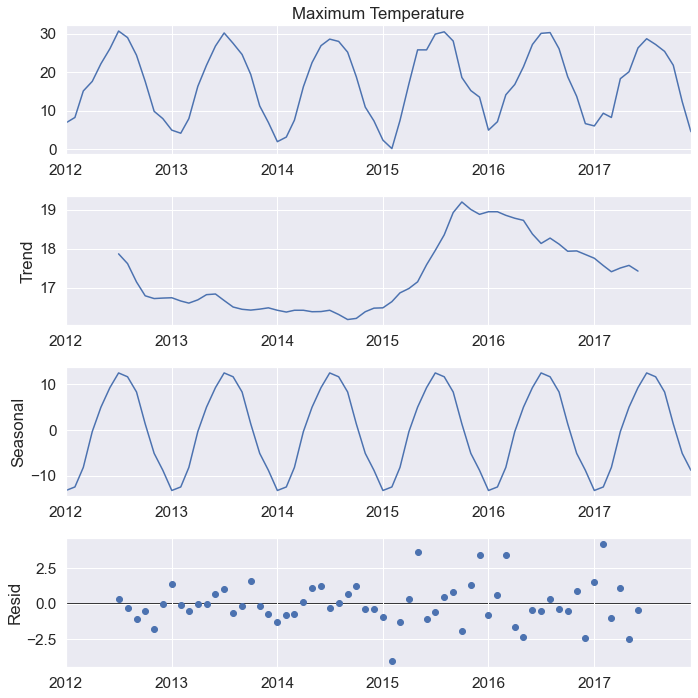

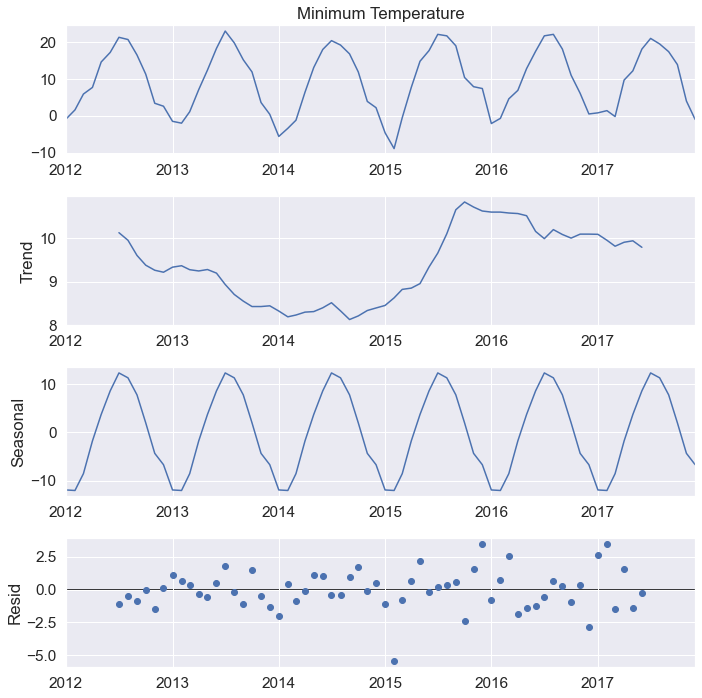

In [78]:
decompose_time_series(data['Consumption (KWH)'])
decompose_time_series(data['Cooling Degree Days Season'])
decompose_time_series(data['Extreme Minimum Temperature'])
decompose_time_series(data['Extreme Maximum Temperature'])
decompose_time_series(data['Heating Degree Days Season'])
decompose_time_series(data['Average Temperature'])
decompose_time_series(data['Maximum Temperature'])
decompose_time_series(data['Minimum Temperature'])

In [79]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    def adjust(val, length=6): 
        return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [80]:
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5231
 No. Lags Chosen       = 12
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.11. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Cooling Degree Days Season" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4688
 No. Lags Chosen       = 12
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.1232. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Extreme Minimum Temperature" 
    ------------------------

In [81]:
# first 1 lag differencing 
data_differenced = data.diff().dropna()

In [82]:
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8784
 No. Lags Chosen       = 11
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0022. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Cooling Degree Days Season" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4027
 No. Lags Chosen       = 11
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.581. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Extreme Minimum Temperature" 
    ---------------------------------------------

>Not all of them are stationary yet. I will try differencing one more time.

In [83]:
# Second 1 lag differencing 
data_differenced = data_differenced.diff().dropna()

In [84]:
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2692
 No. Lags Chosen       = 11
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Cooling Degree Days Season" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -38.5237
 No. Lags Chosen       = 10
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Extreme Minimum Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data 

>All of them are stationary now. The next step is modeling. Please see the next notebook.